# Кредитный скоринг – классификация заемщиков по кредитному статусу

### SKILLFACTORY

### Гринькин Евгений

## Описание кейса

Когда клиент обращается в банк с заявлением о предоставлении кредита, банк принимает решение о выдаче кредита или об отказе в предоставлении кредита с использованием статистических моделей на основании информации о тех клиентах, которые уже брали кредит (кто-то из них выполнил свои обязательства по кредитному договору, а кто-то не выполнил). На вероятность возврата кредита может влиять много факторов, причем сложным образом, и для прогнозирования результатов по каждому отдельному случаю необходимо построить модель машинного обучения, которая на основании данных из заявления о выдаче кредита предсказывает, вернет ли заемщик этот кредит.

## Цель работы

#### Построение модели машинного обучения по предсказанию кредитного дефолта

## Задачи работы

- #### Разведочный анализ данных
- #### Реализация библиотеки автоматического машинного обучения, включающей предобработку признаков, ML c кросс-валидацией, подбор гиперпараметров и выбор оптимальной модели
- #### Построение модели на основе нейронной сети
- #### Оценка качества оптимальной модели модели
- #### Загрузка результатов на Kaggle

## Данные
- #### Источник данных 
Бессрочное учебное соревнование на Kaggle

- #### Датасеты
##### тренировочный набор данных credit_train.csv 
предназначен для обучения модели, 
включает 100000 записей о кредитах, относительно каждого из которых известно значение признака "Loan Status" - "Fully Paid" (погашен полностью) или "Charged Off" (не погашен)
##### тестовый набор данных credit_test.csv, условно разделенный на две части:
- публичная часть
cодержит 5000 записей о кредитах (участникам соревнования недоступна информация о значении признака "Loan Status");
- закрытая часть
содержит 5000 записей о кредитах; вычисление (участникам соревнования недоступна информация о значении признака "Loan Status").

#### Описание полей
- <b>Loan ID</b>: уникальный идентификатор кредита;
- <b>Customer ID</b>: уникальный идентификатор клиента;
- <b>Loan Status</b>: категориальный признак (<b>целевая переменная</b>)- кредит погашен ("Fully Paid") или не погашен ("Charged Off");
- <b>Current Loan Amount</b>: размер кредита;
- <b>Term</b>: срок кредита;
- <b>Credit Score</b>: кредитный рейтинг - число от 0 до 800;
- <b>Years in current job</b>: стаж на текущем месте работы;
- <b>Home Ownership</b>: статус недвижимости - собственность ("Own"), ипотека ("Home Mortgage") или аренда ("Rent");
- <b>Annual Income</b>: годовой доход;
- <b>Purpose</b>: цель кредита;
- <b>Monthly Debt</b>: размер ежемесячного платежа по текущим кредитам;
- <b>Years of Credit History</b>: количество лет кредитной истории;
- <b>Months since last delinquent</b>: количество месяцев с последнего нарушения условий кредита;
- <b>Number of Open Accounts</b>: количество открытых кредитных карт;
- <b>Number of Credit Problems</b>: количество кредитных проблем;
- <b>Current Credit Balance</b>: суммарный текущий долг;
- <b>Maximum Open Credit</b>: максимальный кредитный лимит из всех источников;
- <b>Bankruptcies</b>: количество банкротств;
- <b>Tax Liens</b>: количество нарушений налогового законодательства.

## Этапы работы

### EDA

- В тренировочном датасете выявлены и удалены полные дубликаты в данных.

- Показано, что наблюдается невысокая степень несбалансированности классов (приблизительно 1 : 3):

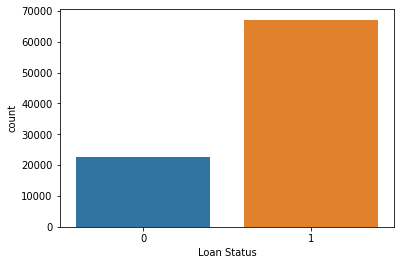!

Такие атрибуты как "Размер кредита", "Кредитный рейтиг", "Годовой доход", "Суммарный текущий долг" и "Максимальный кредитный лимит из всех источников", содержат выбросы.


С помощью статистических методов оценена значимость признаков. Показано, что среди числовых признаков самыми значимыми являеются кредитный рейтинг и размер кредита, а среди категориальных - срок кредита:

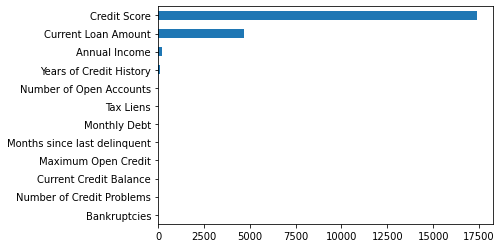

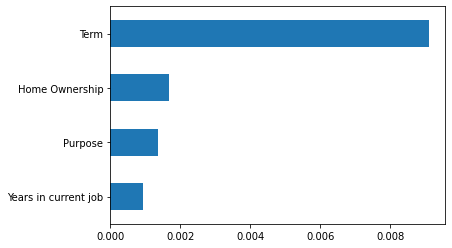

Между некоторыми признаками выявлена линейная корреляция Пирсона с коэффициентом, достигающим 0.8. Наблюдаемые линейные статистические взаимосвязи не противоречат бизнес-смыслу коррелирующих показателей.

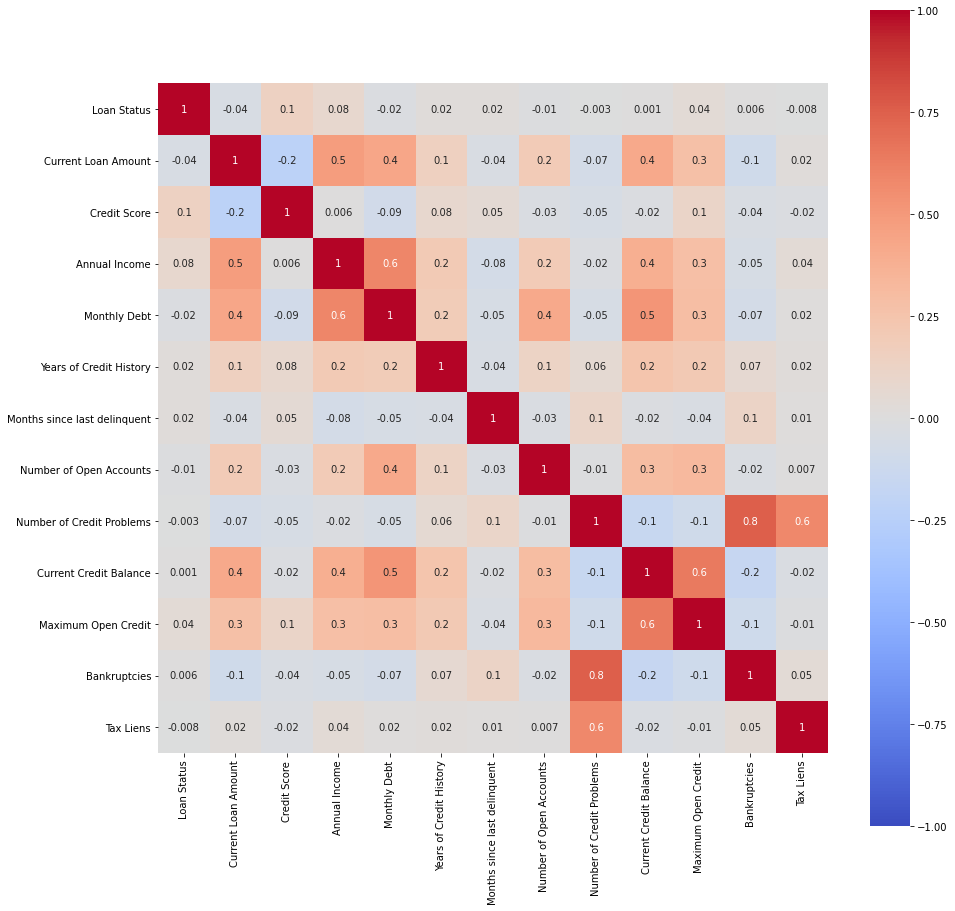

## Machine Learning

Реализована библиотека, автоматизирующая последовательные части конвейера машинного обучения:
- заполнение пропусков в данных
- кодирование категориальных переменных
- масштабирование числовых переменных
- подбор признаков
- выбор модели
- настройку гиперпараметров.


Методом случайного решетчатого поиска с кросс-валидацией выбраны оптимальные гиперпараметры машинного обучения:
- без масштабирования числовых признаков
- алгоритм заполнения пропусков - медиана
- количество выбранных для обучения модели признаков - 41 шт.
- алгоритм ML - "случайный лес"
- количество деревьев - 275 шт.
- критерий информативности - Джини.

Обучение указанной модели ML позволило достичь Accuracy, составляющей более 0.8.

Тонкая настройка гиперпараметров не привела к улучшению результата.
Многочисленные эксперименты по предварительному удалению выбросов из данных, генерации новых признаков, приведению непрерывных переменных к распределению, близкому к нормальному, понижению размерности признакового пространства и т.п. также не привели к улучшению метрики.

## Deep Learning


- На тренировочных данных обучен многослоевой перцептрон
- Построен пайплайн, включающий заполнение пустых значений признаков, one-hot-кодирование категориальных признаков и стандартизацию числовых признаков, отбор значимых признаков и непосредственно обучение модели.
- Подбор гиперпараметров осуществлен с помощью случайного решетчатого поиска с кросс-валидацией на 5 фолдах.
- Значение метрики не превзошло достигнутого ранее результата с помощью "случайного леса".

## Оценка качества модели

Оценены метрики качества модели, которые, наряду с Accuracy, также имеют значение для бизнеса:

- F1-мера - 0.88
- Recall - 0.99
- Specificity: 0.24
- Precision: 0.79
- Ошибка I рода: 0.76
- Ошибка II рода: 0.0097

#### Матрица ошибок

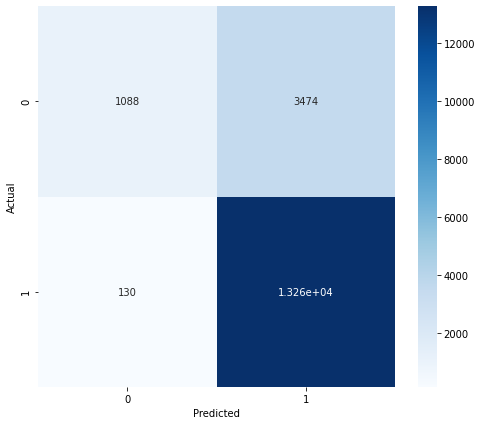

#### Кривая ошибок

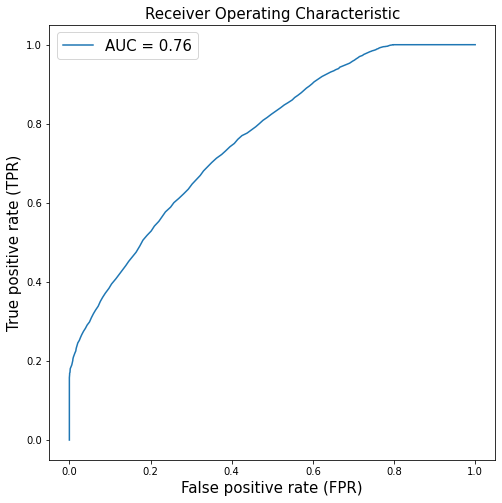

## Результаты на Kaggle

по состоянию на 05.06.2021
nickname - Evgeniy Grinkin

- Accuracy - 0.82266
- TOP 7%
- 17 место из 269